In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np

import esmlab
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import pop_tools 

from statistics import mean
from matplotlib import style
from scipy import stats
import pandas as pd

style.use('default')
import matplotlib.path as mpath

from IPython.display import Image

coldwater species = above 40° latitude

In [6]:
df = pd.DataFrame(columns=['PFT_group','study', 'species', 'isolate_location','gChl/gC','notes'])

In [7]:
df = df.append({'PFT_group': 'diat',
                'study': 'Lomas_etal_2019', 
                'species': 'Attheya septentrionalis', 
                'isolate_location': 'Baffin Bay (77.8N, 76.4W), N. Atlantic Ocean',
                'gChl/gC':0.13}, ignore_index=True)

In [8]:
df = df.append({'PFT_group': 'diat',
                'study': 'Lomas_etal_2019', 
                'species': 'Skeletonema dohrni', 
                'isolate_location': 'Kasitsna Bay (59.5N, 151.4W), Alaska',
                'gChl/gC':0.040}, ignore_index=True)

In [9]:
df = df.append({'PFT_group': 'diat',
                'study': 'Lomas_etal_2019', 
                'species': 'Porosira glacialis', 
                'isolate_location': 'Narragansett Bay (41.6N, 71.4W), Rhode Island',
                'gChl/gC':0.061}, ignore_index=True)

In [10]:
df = df.append({'PFT_group': 'diat',
                'study': 'Lomas_etal_2019', 
                'species': 'Melosira nummuloides', 
                'isolate_location': 'Harwich Harbor (41.7N, 70W), Massachusetts',
                'gChl/gC':0.040}, ignore_index=True)

In [11]:
df = df.append({'PFT_group': 'diat',
                'study': 'Lomas_etal_2019', 
                'species': 'Odontella aurita', 
                'isolate_location': 'Webb Cove 44.2N, 69.5W), Stonington, Maine',
                'gChl/gC':0.053}, ignore_index=True)

In [12]:
df = df.append({'PFT_group': 'diat',
                'study': 'Lomas_etal_2019', 
                'species': 'Thalassiosira antarctica', 
                'isolate_location': 'Oslo Fjord (59.5N, −10.6W), Norway',
                'gChl/gC':0.055}, ignore_index=True)

In [13]:
df = df.append({'PFT_group': 'diat',
                'study': 'Lomas_etal_2019', 
                'species': 'Thalassiosira nordenskioeldii', 
                'isolate_location': 'Tromsø (69.7N, −18.7W), Norway',
                'gChl/gC':0.073}, ignore_index=True)

In [14]:
df = df.append({'PFT_group': 'diat',
                'study': 'Lomas_etal_2019', 
                'species': 'Thalassiosira aestivalis', 
                'isolate_location': 'North Atlantic Ocean (42.7N, 69.6W)',
                'gChl/gC':0.043}, ignore_index=True)

In [15]:
df = df.append({'PFT_group': 'diat',
                'study': 'Lomas_etal_2019', 
                'species': 'Thalassiosira gravida', 
                'isolate_location': 'Tromsø (59.5N, −10.6W), Norway',
                'gChl/gC':0.061}, ignore_index=True)

In [16]:
df = df.append({'PFT_group': 'diat',
                'study': 'Geider_etal_1997,Geider_etal_1985', 
                'species': 'Phaeodactylum tricornutum', 
                'isolate_location': 'unknown; worldwide distribution',
                'gChl/gC':0.072}, ignore_index=True)

In [17]:
df = df.append({'PFT_group': 'diat',
                'study': 'Geider_etal_1997,Terry_etal_1983', 
                'species': 'Phaeodactylum tricornutum', 
                'isolate_location': 'unknown; worldwide distribution',
                'gChl/gC':0.067}, ignore_index=True)

In [18]:
df = df.append({'PFT_group': 'diat',
                'study': 'Geider_etal_1997,Cosper_1982', 
                'species': 'Skeletonema costatum', 
                'isolate_location': 'unknown; temperate waters',
                'gChl/gC':0.036}, ignore_index=True)

In [19]:
df = df.append({'PFT_group': 'diat',
                'study': 'Geider_etal_1997,Cosper_1982', 
                'species': 'Skeletonema costatum', 
                'isolate_location': 'unknown; temperate waters',
                'gChl/gC':0.036}, ignore_index=True)

In [20]:
df = df.append({'PFT_group': 'diat',
                'study': 'Geider_etal_1997,Landgon_1988', 
                'species': 'Skeletonema costatum', 
                'isolate_location': 'unknown; temperate waters',
                'gChl/gC':0.061}, ignore_index=True)

In [21]:
df = df.append({'PFT_group': 'diat',
                'study': 'Geider_etal_1997,Yoder_1979', 
                'species': 'Skeletonema costatum', 
                'isolate_location': 'Narragansett Bay (41.6N, 71.4W), Rhode Island',
                'gChl/gC':0.047}, ignore_index=True)

In [22]:
df = df.append({'PFT_group': 'diat',
                'study': 'Geider_etal_1997,Geider_1984', 
                'species': 'Thalassiosira pseudonana', 
                'isolate_location': 'unknown',
                'gChl/gC':0.059}, ignore_index=True)

In [23]:
df = df.append({'PFT_group': 'diat',
                'study': 'Geider_etal_1997,Falkowski_etal_1985', 
                'species': 'Thalassiosira weissflogii', 
                'isolate_location': 'Long Island Sound',
                'gChl/gC':0.055}, ignore_index=True)

In [24]:
df = df.append({'PFT_group': 'diat',
                'study': 'Geider_etal_1997,Laws_Bannister_1980', 
                'species': 'Thalassiosira weissflogii', 
                'isolate_location': 'unknown',
                'gChl/gC':0.058}, ignore_index=True)

In [25]:
df = df.append({'PFT_group': 'sp',
                'study': 'Geider_etal_1997,Langdon_1988', 
                'species': 'Olisthodiscus luteus', 
                'isolate_location': 'unknown',
                'gChl/gC':0.033}, ignore_index=True)

In [26]:
df = df.append({'PFT_group': 'sp',
                'study': 'Geider_etal_1997,Kana_Gilbert_1987', 
                'species': 'Synecchococcus spp.', 
                'isolate_location': 'unknown',
                'gChl/gC':0.021}, ignore_index=True)

In [27]:
df = df.append({'PFT_group': 'sp',
                'study': 'Geider_etal_1997,Langdon_1988', 
                'species': 'Gonyaulax tamarensis', 
                'isolate_location': 'unknown',
                'gChl/gC':0.015}, ignore_index=True)

In [28]:
df = df.append({'PFT_group': 'sp',
                'study': 'Geider_etal_1997,Nielson_1996', 
                'species': 'Gymnodinium galatheanum', 
                'isolate_location': 'Olsofjord, Norway',
                'gChl/gC':0.015}, ignore_index=True)

In [29]:
df = df.append({'PFT_group': 'sp',
                'study': 'Geider_etal_1997,Nielson_1992', 
                'species': 'Gyrodinium aureolum', 
                'isolate_location': 'unknown',
                'gChl/gC':0.047}, ignore_index=True)

In [30]:
df = df.append({'PFT_group': 'sp',
                'study': 'Geider_etal_1997,Falkowski_etal_1985', 
                'species': 'Prorocentrum micans', 
                'isolate_location': 'unknown; temperate to tropical',
                'gChl/gC':0.007}, ignore_index=True)

In [31]:
df = df.append({'PFT_group': 'sp',
                'study': 'Geider_etal_1997,Rivkin_etal_1982', 
                'species': 'Pyrocystis notiluca', 
                'isolate_location': 'Sargasso Sea',
                'gChl/gC':0.008}, ignore_index=True)

In [32]:
df = df.append({'PFT_group': 'sp',
                'study': 'Geider_etal_1997,Muggali_Harrison_1997', 
                'species': 'Emiliania huxleyi', 
                'isolate_location': 'Subarctic North Pacific, Station P',
                'gChl/gC':0.017}, ignore_index=True)

In [33]:
df = df.append({'PFT_group': 'sp',
                'study': 'Verity_etal_1991', 
                'species': 'Phaeocystis pouchetti', 
                'isolate_location': 'Tromso, Norway',
                'gChl/gC':0.015,'notes':'largest value reported among solitary & colonies'}, ignore_index=True)

In [34]:
df = df.append({'PFT_group': 'diat',
                'study': 'Sakshaug_etal_1991', 
                'species': 'Thalassiosira nordenskioeldii', 
                'isolate_location': 'Barents Sea',
                'gChl/gC':0.062,'notes':'low light adapted, 12 h'}, ignore_index=True)

In [35]:
df = df.append({'PFT_group': 'diat',
                'study': 'Sakshaug_etal_1991', 
                'species': 'Chaetoceros furcellatus', 
                'isolate_location': 'Barents Sea',
                'gChl/gC':0.036,'notes':'low light adapted, 12 h'}, ignore_index=True)

### CESM diat gChl/gC:
#### diat: 0.046
#### sp: 0.028

In [36]:
df

,PFT_group,study,species,isolate_location,gChl/gC,notes
0,diat,Lomas_etal_2019,Attheya septentrionalis,"Baffin Bay (77.8N, 76.4W), N. Atlantic Ocean",0.130,NaN
1,diat,Lomas_etal_2019,Skeletonema dohrni,"Kasitsna Bay (59.5N, 151.4W), Alaska",0.040,NaN
2,diat,Lomas_etal_2019,Porosira glacialis,"Narragansett Bay (41.6N, 71.4W), Rhode Island",0.061,NaN
3,diat,Lomas_etal_2019,Melosira nummuloides,"Harwich Harbor (41.7N, 70W), Massachusetts",0.040,NaN
4,diat,Lomas_etal_2019,Odontella aurita,"Webb Cove 44.2N, 69.5W), Stonington, Maine",0.053,NaN
5,diat,Lomas_etal_2019,Thalassiosira antarctica,"Oslo Fjord (59.5N, −10.6W), Norway",0.055,NaN
6,diat,Lomas_etal_2019,Thalassiosira nordenskioeldii,"Tromsø (69.7N, −18.7W), Norway",0.073,NaN
7,diat,Lomas_etal_2019,Thalassiosira aestivalis,"North Atlantic Ocean (42.7N, 69.6W)",0.043,NaN
8,diat,Lomas_etal_2019,Thalassiosira gravida,"Tromsø (59.5N, −10.6W), Norway",0.061,NaN
9,diat,"Geider_etal_1997,Geider_etal_1985",Phaeodactylum tricornutum,unknown; worldwide distribution,0.072,NaN


In [37]:
df.to_csv('/glade/work/kristenk/nb_for_jupyterbook/data/Chl_C_ratios.csv',index = False, header=True)

In [65]:
selection_diat = df[(df['PFT_group'] =='diat')]
selection_diat['gChl/gC'].mean()

0.05725000000000001

In [64]:
selection_sp = df[(df['PFT_group'] =='sp')]
selection_sp['gChl/gC'].mean()

0.019777777777777783

### make a bar plot

In [54]:
species_diat = np.asarray(selection_diat.species)
species_sp = np.asarray(selection_sp.species)
#species_diat

In [55]:
ratio_diat = np.asarray(selection_diat['gChl/gC'])
ratio_sp = np.asarray(selection_sp['gChl/gC'])
#ratio_diat

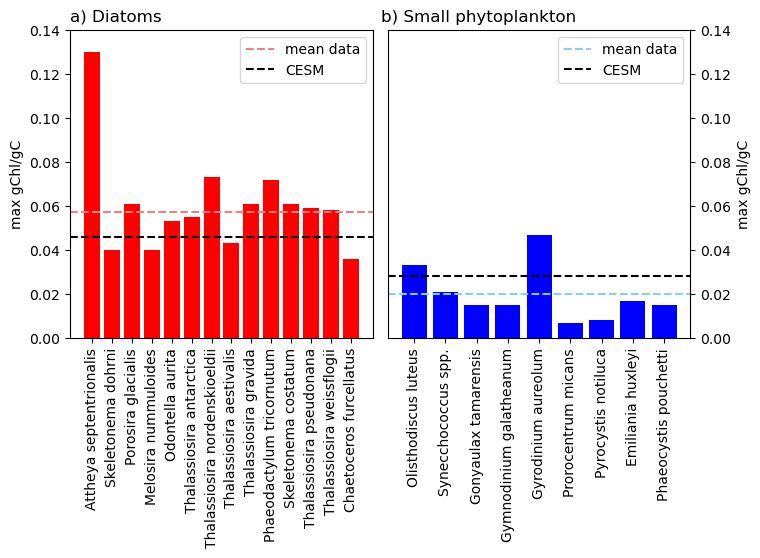

In [80]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,2,1)
ax.set_ylim(0,0.14)
ax.set_title('a) Diatoms', x=0.15)
ax.bar(species_diat,ratio_diat, color='red')
ax.set_ylabel('max gChl/gC')
ax.tick_params(axis='x', labelrotation = 90)
plt.axhline(y=selection_diat['gChl/gC'].mean(), color='lightcoral', linestyle='--',label='mean data')
plt.axhline(y=0.046, color='black', linestyle='--', label='CESM')
ax.legend()

ax = fig.add_subplot(1,2,2)
ax.set_ylim(0,0.14)
ax.set_title('b) Small phytoplankton',x=0.3)
ax.bar(species_sp,ratio_sp, color='blue')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('max gChl/gC')
plt.axhline(y=selection_sp['gChl/gC'].mean(), color='lightskyblue', linestyle='--',label='mean data')
plt.axhline(y=0.028, color='black', linestyle='--', label='CESM')
ax.yaxis.set_label_position("right")
ax.legend()
ax.yaxis.tick_right();

fig.subplots_adjust(wspace=0.05)